# ***Machine Learning model interpretation***

# 📚 ***Import libraries***

In [1]:
# base libraries for data science

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import load
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# 💾 ***Load model***

In [2]:
from joblib import load

# Load the saved model (preprocessing + XGBoost)
nyc_houses_model = load("nyc_houses_regression-xgboost-v1.joblib")

In [3]:
# print library version for reproducibility
print("Pandas version: ", pd.__version__)

Pandas version:  2.2.3


# ***Model Interpretation***

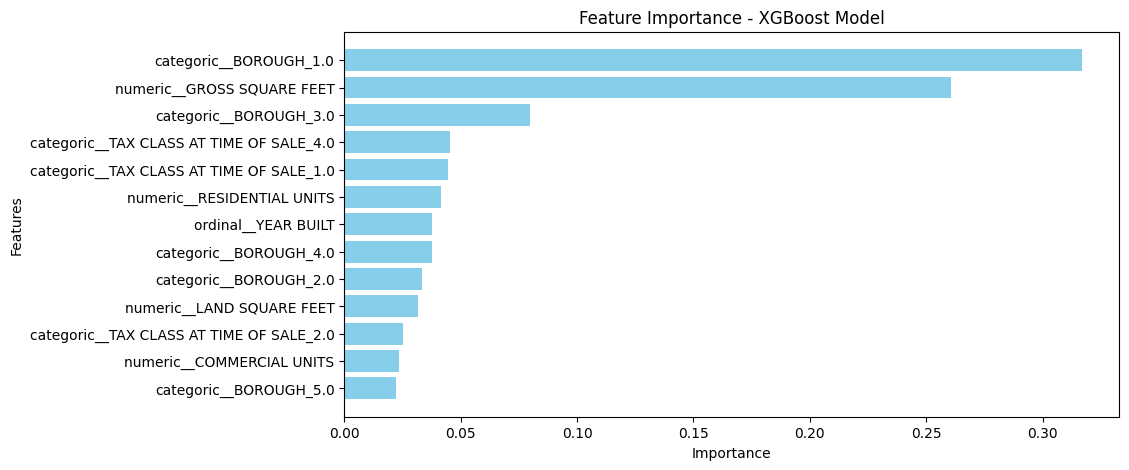

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature names from the preprocessor
features = nyc_houses_model["preprocessor"].get_feature_names_out()

# Extract feature importances from the trained XGBoost model
importances = nyc_houses_model["model"].feature_importances_

# Create a DataFrame with feature importances
df_features = pd.DataFrame({"Features": features, "Importances": importances})
df_features = df_features.sort_values(by="Importances", ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 5))
plt.barh(df_features["Features"], df_features["Importances"], color="skyblue")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance - XGBoost Model")
plt.gca().invert_yaxis()  # Invert y-axis to have the most important features on top
plt.show()

In [5]:
df_features

,Features,Importances
7,categoric__BOROUGH_1.0,0.317075
0,numeric__GROSS SQUARE FEET,0.260687
9,categoric__BOROUGH_3.0,0.079762
6,categoric__TAX CLASS AT TIME OF SALE_4.0,0.045364
4,categoric__TAX CLASS AT TIME OF SALE_1.0,0.044643
3,numeric__RESIDENTIAL UNITS,0.041433
12,ordinal__YEAR BUILT,0.037767
10,categoric__BOROUGH_4.0,0.037489
8,categoric__BOROUGH_2.0,0.033425
1,numeric__LAND SQUARE FEET,0.031565


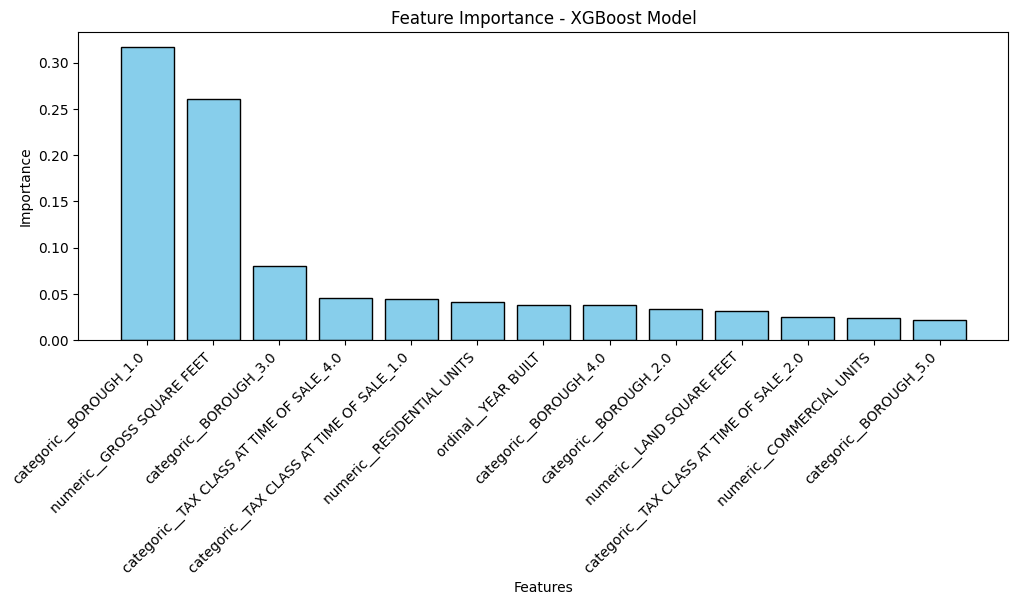

In [6]:
# Create the bar plot
plt.figure(figsize=(12, 4))
plt.bar(
    df_features["Features"],  # Feature names
    df_features["Importances"],  # Feature importances
    capsize=5,  # Add caps to error bars
    edgecolor="black",  # Add borders to bars
    color="skyblue"  # Set bar color
)

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance - XGBoost Model")
plt.xticks(rotation=45, ha="right")  # Rotate feature names for better visibility

# Show the plot
plt.show()

## ***Feature permutation***
### 💾 ***Load data***

In [7]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

nyc_houses_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/nyc_houses_semi_cleaned.parquet", engine="pyarrow"
)

nyc_houses_df.loc[:, "SALE PRICE"] = nyc_houses_df["SALE PRICE"].astype(float)
nyc_houses_df = nyc_houses_df.drop_duplicates()

In [8]:
X_features = nyc_houses_df.drop(columns=["SALE PRICE"])
Y_target = nyc_houses_df["SALE PRICE"]

In [9]:
# 80% train, 20% test
x_train, x_test, y_train, y_test = train_test_split(
    X_features, Y_target, test_size=0.2, random_state=42
)

C:\Users\SOULG\AppData\Local\Temp\ipykernel_14644\1860741601.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


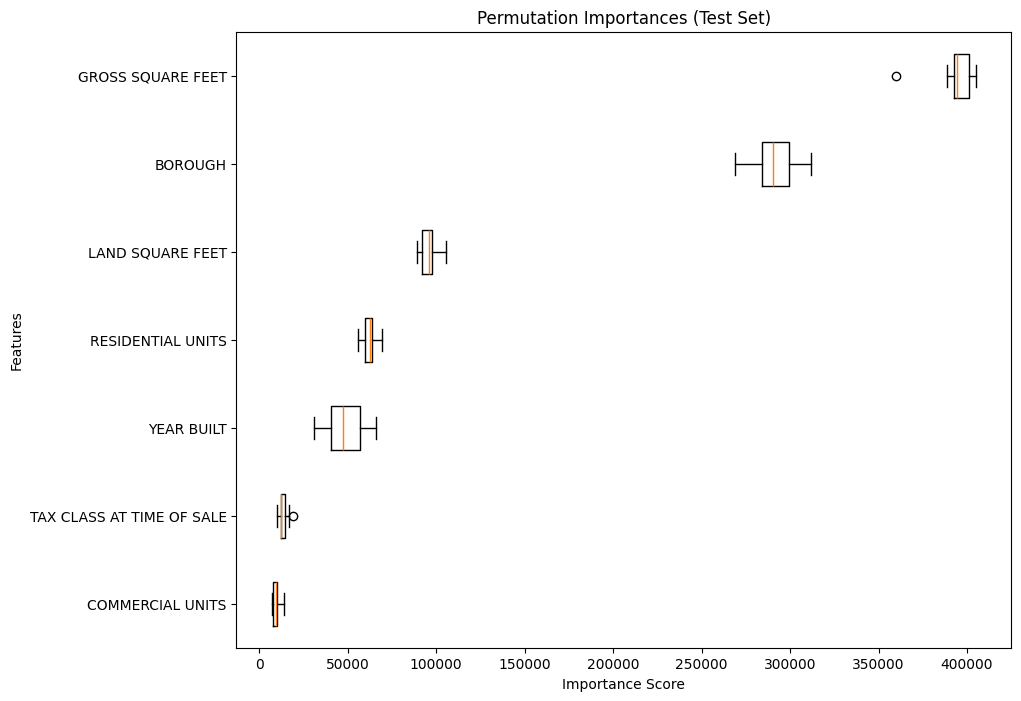

In [10]:
# Compute permutation importances for the test set
imps = permutation_importance(
    nyc_houses_model, x_test, y_test, scoring="neg_root_mean_squared_error", 
    n_repeats=10, random_state=42, n_jobs=8
)

# Sort the features by importance
perm_sorted_idx = imps.importances_mean.argsort()

# Plot the permutation importance
plt.figure(figsize=(10, 8))
plt.boxplot(
    imps.importances[perm_sorted_idx].T, vert=False, 
    labels=np.array(x_test.columns)[perm_sorted_idx]
)
plt.title("Permutation Importances (Test Set)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Variables with more predictive power will have a higher impact on the model’s performance when permuted.Based on the results, the most important features are:
- ***`GROSS SQUARE FEET`***
- ***`BOROUGH`***

With moderate importance:

- ***`LAND SQUARE FEET`***
- ***`RESIDENTIAL UNITS`***
- ***`YEAR BUILT`***

The results are consistent with the feature analysis.

# 📊 ***Analysis of Results***

The analysis of feature importances, based on permutation importance, reveals that ***gross square feet*** is the most significant predictor in the model, highlighting the crucial role of property size in determining sale prices. ***Borough*** follows closely, reinforcing the impact of location on property valuation. Other important features include ***land square feet***, ***residential units***, and ***year built***, which contribute to a lesser extent but still influence pricing. ***Tax class at the time of sale*** and ***commercial units*** show lower predictive power. Understanding these feature importances provides insights into the model’s decision-making process and the key drivers of property valuation in the dataset.